# MARATONA BEHIND THE CODE 2020

In [1]:
pip install scikit-learn==0.24.1 --upgrade

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost==1.3.3 --upgrade

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, cross_validate
from sklearn import metrics #Additional sklearn functions
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV #Perforing grid search
from xgboost import plot_importance
from imblearn.over_sampling import SMOTE

In [4]:
dataset_desafio_2 = pd.read_csv('../input/desafio-02-uninassau/dataset_desafio_2.csv')

# Exploratory Data Analysis 

In [5]:
dataset_desafio_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MATRICULA       20000 non-null  int64  
 1   NOME            20000 non-null  object 
 2   REPROVACOES_DE  20000 non-null  int64  
 3   REPROVACOES_EM  20000 non-null  int64  
 4   REPROVACOES_MF  20000 non-null  int64  
 5   REPROVACOES_GO  20000 non-null  int64  
 6   NOTA_DE         20000 non-null  float64
 7   NOTA_EM         20000 non-null  float64
 8   NOTA_MF         20000 non-null  float64
 9   NOTA_GO         16284 non-null  float64
 10  INGLES          16372 non-null  float64
 11  H_AULA_PRES     20000 non-null  int64  
 12  TAREFAS_ONLINE  20000 non-null  int64  
 13  FALTAS          20000 non-null  int64  
 14  PERFIL          20000 non-null  object 
dtypes: float64(5), int64(8), object(2)
memory usage: 2.3+ MB


In [6]:
dataset_desafio_2.loc[:,['REPROVACOES_DE','REPROVACOES_EM','REPROVACOES_MF','REPROVACOES_GO',
                         'NOTA_DE','NOTA_EM','NOTA_MF','NOTA_GO','H_AULA_PRES', 'TAREFAS_ONLINE', 
                         'FALTAS']].describe()

,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,H_AULA_PRES,TAREFAS_ONLINE,FALTAS
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,16284.000000,20000.000000,20000.000000,20000.000000
mean,0.242850,0.242850,0.297650,0.293350,5.196560,5.080285,4.817630,4.534101,5.102950,3.140300,4.060600
std,0.615055,0.615055,0.672813,0.661829,2.522545,2.523928,2.734775,2.509209,4.118422,1.854909,1.674714
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,5.200000,4.900000,4.700000,4.500000,2.000000,2.000000,3.000000
50%,0.000000,0.000000,0.000000,0.000000,6.200000,5.900000,5.500000,5.400000,4.000000,3.000000,4.000000
75%,0.000000,0.000000,0.000000,0.000000,6.700000,6.700000,6.500000,6.200000,6.000000,5.000000,6.000000
max,3.000000,3.000000,3.000000,3.000000,9.000000,9.400000,11.500000,10.000000,25.000000,7.000000,8.000000


In [7]:
dataset_desafio_2.isnull().sum()

MATRICULA            0
NOME                 0
REPROVACOES_DE       0
REPROVACOES_EM       0
REPROVACOES_MF       0
REPROVACOES_GO       0
NOTA_DE              0
NOTA_EM              0
NOTA_MF              0
NOTA_GO           3716
INGLES            3628
H_AULA_PRES          0
TAREFAS_ONLINE       0
FALTAS               0
PERFIL               0
dtype: int64

In [8]:
dataset_desafio_2['NOTA_GO']= dataset_desafio_2['NOTA_GO'].fillna(0)

In [9]:
dataset_desafio_2['INGLES']= dataset_desafio_2['INGLES'].fillna(0)

In [10]:
dataset_desafio_2.shape

(20000, 15)

In [11]:
dataset_desafio_2.duplicated().sum()

0

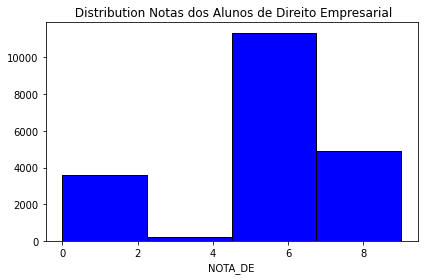

In [12]:
plt.hist(dataset_desafio_2['NOTA_DE'],bins=4, color='blue', edgecolor='black',)
plt.xlabel('NOTA_DE')
plt.title(' Distribution Notas dos Alunos de Direito Empresarial')
plt.tight_layout()
plt.show()

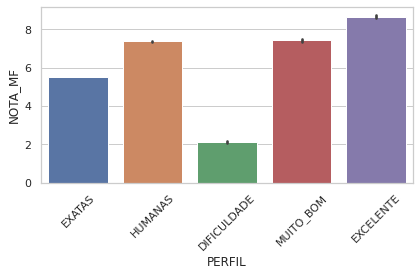

In [13]:
sns.set_theme(style="whitegrid")
sns.barplot(x='PERFIL', y='NOTA_MF', data=dataset_desafio_2)
plt.xlabel('PERFIL')
plt.ylabel('NOTA_MF')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [14]:
dataset_rank_desafio_2 = dataset_desafio_2.rank()

Text(0.5, 1.0, 'Correlation Heatmap')

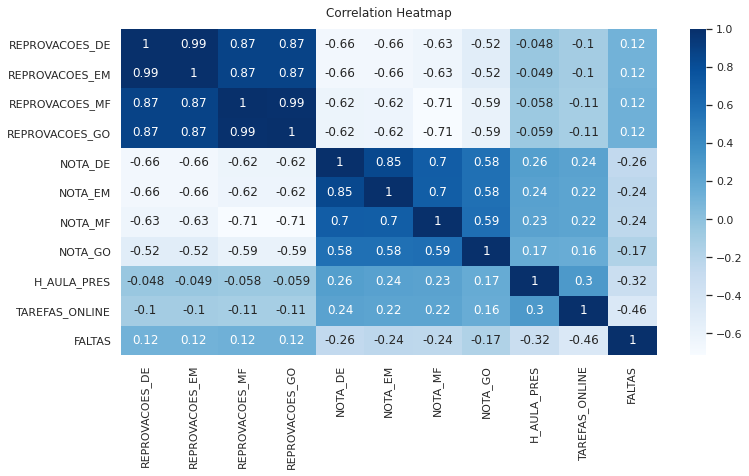

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset_rank_desafio_2.loc[:,['REPROVACOES_DE','REPROVACOES_EM','REPROVACOES_MF','REPROVACOES_GO',
                         'NOTA_DE','NOTA_EM','NOTA_MF','NOTA_GO','H_AULA_PRES', 'TAREFAS_ONLINE', 
                         'FALTAS']].corr('spearman'), annot=True, cmap='Blues')
plt.title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [16]:
dataset_desafio_2['PERFIL'].unique()

array(['EXATAS', 'HUMANAS', 'DIFICULDADE', 'MUITO_BOM', 'EXCELENTE'],
      dtype=object)

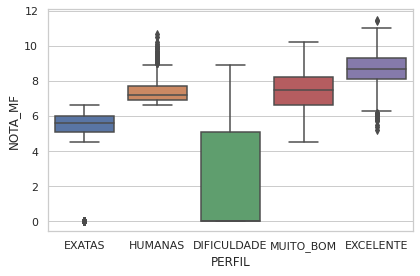

In [17]:
sns.boxplot(x=dataset_desafio_2['PERFIL'],y=dataset_desafio_2['NOTA_MF'])
plt.tight_layout()
plt.show()

In [18]:
dataset_desafio_2['PERFIL'].value_counts(ascending=True)

EXCELENTE       671
MUITO_BOM       902
HUMANAS        3196
DIFICULDADE    7001
EXATAS         8230
Name: PERFIL, dtype: int64

In [19]:
labelencoder = LabelEncoder()
dataset_desafio_2['PERFIL'] = labelencoder.fit_transform(dataset_desafio_2['PERFIL'])

In [20]:
y = dataset_desafio_2.PERFIL

In [21]:
y.head()

0    1
1    1
2    3
3    0
4    0
Name: PERFIL, dtype: int64

In [22]:
X = dataset_desafio_2.drop(['MATRICULA','NOME','PERFIL'],axis=1)

In [23]:
X.head()

,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS
0,0,0,0,0,6.2,5.8,4.6,5.9,0.0,2,4,3
1,0,0,0,0,6.0,6.2,5.2,4.5,1.0,2,4,3
2,0,0,0,0,7.3,6.7,7.1,7.2,0.0,5,0,3
3,1,3,1,1,0.0,0.0,0.0,0.0,1.0,4,4,4
4,1,3,1,1,0.0,0.0,0.0,0.0,1.0,5,2,5


In [24]:
sm = SMOTE(sampling_strategy='minority',random_state=42)

In [25]:
X, y = sm.fit_resample(X, y)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42, stratify=y)

In [27]:
X_train.shape

(22047, 12)

In [28]:
X_test.shape

(5512, 12)

In [29]:
model1 = xgb.XGBClassifier(max_depth=6, n_estimators=200, use_label_encoder=False,num_class=5, learning_rate=0.05,reg_alpha=0,reg_lambda=1,eval_metric ='merror',  
                              booster='gbtree',objective='multi:softprob')

model1.fit(X_train,y_train, 
          verbose=True,
          early_stopping_rounds=10,
          eval_set=[(X_train,y_train)])
print(model1)

[0]	validation_0-merror:0.14564
[1]	validation_0-merror:0.14592
[2]	validation_0-merror:0.14596
[3]	validation_0-merror:0.14542
[4]	validation_0-merror:0.14505
[5]	validation_0-merror:0.14437
[6]	validation_0-merror:0.14455
[7]	validation_0-merror:0.14415
[8]	validation_0-merror:0.14297
[9]	validation_0-merror:0.14324
[10]	validation_0-merror:0.14260
[11]	validation_0-merror:0.14265
[12]	validation_0-merror:0.14242
[13]	validation_0-merror:0.14251
[14]	validation_0-merror:0.14211
[15]	validation_0-merror:0.14161
[16]	validation_0-merror:0.14197
[17]	validation_0-merror:0.14183
[18]	validation_0-merror:0.14152
[19]	validation_0-merror:0.14133
[20]	validation_0-merror:0.14075
[21]	validation_0-merror:0.14038
[22]	validation_0-merror:0.14038
[23]	validation_0-merror:0.13984
[24]	validation_0-merror:0.13975
[25]	validation_0-merror:0.13961
[26]	validation_0-merror:0.13961
[27]	validation_0-merror:0.13970
[28]	validation_0-merror:0.13934
[29]	validation_0-merror:0.13920
[30]	validation_0-me

In [30]:
# fit model no training data
model2 = xgb.XGBClassifier(max_depth=6,subsample=0.8, n_estimators=200, use_label_encoder=False,num_class=5, learning_rate=0.05,reg_alpha=0,reg_lambda=1,eval_metric ='mlogloss',  
                              booster='gbtree',objective='multi:softprob')
model2.fit(X_train,y_train)
print(model2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=2,
              num_class=5, num_parallel_tree=1, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=0.8, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)


In [31]:
score = model2.score(X_train,y_train)
print(score)

0.8879666167732572


In [32]:
y_pred = model2.predict(X_test)

In [33]:
# Get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1400
           1       0.81      0.93      0.86      1646
           2       0.94      0.98      0.96      1646
           3       0.78      0.91      0.84       639
           4       0.38      0.03      0.05       181

    accuracy                           0.87      5512
   macro avg       0.76      0.72      0.71      5512
weighted avg       0.86      0.87      0.85      5512



<Figure size 1152x864 with 0 Axes>

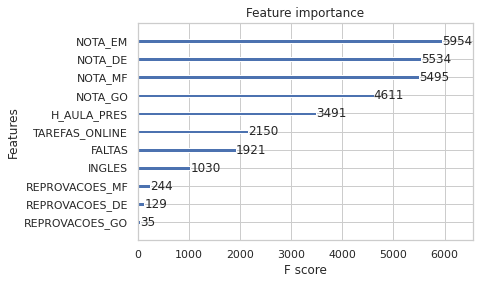

In [34]:
plt.figure(figsize=(16, 12))
xgb.plot_importance(model2)
plt.show()

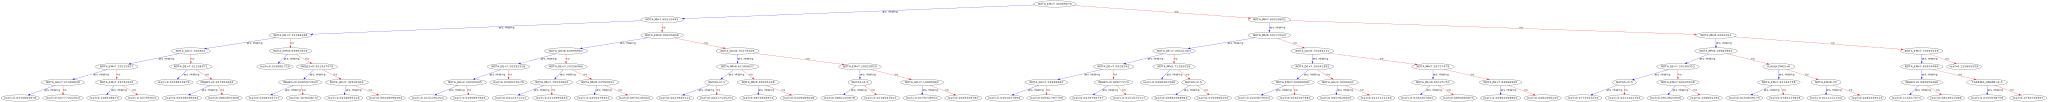

In [35]:
xgb.to_graphviz(model2, num_trees=2)


In [36]:
ypred = model2.predict(X_test)
print(ypred)

[1 3 0 ... 0 1 2]


In [37]:
dtrain = xgb.DMatrix(X_train, label=y_train)

In [38]:
params = {'max_depth':6, 'eta': 1, 'objective': 'multi:softprob', 'eval_metric':['merror'], 'num_class':5, 'learning_rate':0.05,
         'reg_alpha':0, 'reg_lambda':1}

In [39]:
cov_res=xgb.cv(params, nfold=10, dtrain=dtrain)

In [40]:
cov_res.head()

,train-merror-mean,train-merror-std,test-merror-mean,test-merror-std
0,0.147216,0.001017,0.157300,0.003459
1,0.146021,0.001146,0.155304,0.003735
2,0.145230,0.000996,0.155395,0.005401
3,0.145023,0.000862,0.154760,0.004590
4,0.144313,0.000996,0.155577,0.005076


In [41]:
kfold = KFold(n_splits=2, shuffle=True, random_state=42)

In [42]:
param_grid = { 
    'eta':[0.5,1],
    'colsample_bytree':[0.5,.75,1],
    'learning_rate':[0.1,0.3,0.4,0.5],
    'max_depth':[1,2,3,5,6],
    'subsample':[0.5,.75,1],
    'n_estimators': [10,100]
}


In [43]:
xgboost_model3 = xgb.XGBClassifier(objective='multi:softprob', eval_metric='merror', use_label_encoder=False)


In [44]:
model_Grid = GridSearchCV(estimator = xgboost_model3,param_grid = param_grid)
model_Grid.fit(X_train,y_train)
print(model_Grid.best_params_)

{'colsample_bytree': 0.5, 'eta': 0.5, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 1}


In [45]:
model4 = xgb.XGBClassifier(eta=0.5, max_depth=6,subsample=1, n_estimators=100, use_label_encoder=False,num_class=5, learning_rate=0.1,reg_alpha=0,reg_lambda=1,eval_metric ='merror',  
                              booster='gbtree',objective='multi:softprob', colsample_bytree=0.5)

In [46]:
model4.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.5,
              eval_metric='merror', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_class=5, num_parallel_tree=1, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [47]:
predict = model4.predict(X_test)